This notebook examines the changes of federal fundings in different areas in year 2023 to 2028

By Wanchen Hong

## 1. Load the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

capital_budget = pd.read_csv('data/capital_budget.csv')
operating_budget = pd.read_csv('data/operating_budget.csv')

In [2]:
capital_budget_area = capital_budget[['Neighborhood', 'Authorization_Previous',
       'Authorization_Current', 'Authorization_Future', 'Grant_Existing',
       'Grant_Current', 'Grant_Future', 'Capital_Expended', 'Capital_Year_0',
       'Capital_Year_1', 'Capital_Year_2_5', 'Grant_Expended', 'Grant_Year_0',
       'Grant_Year_1', 'GrantYear_2_5', 'External_Funds',
       'Total_Project_Budget']]

In [3]:
capital_budget_area.head()

,Neighborhood,Authorization_Previous,Authorization_Current,Authorization_Future,Grant_Existing,Grant_Current,Grant_Future,Capital_Expended,Capital_Year_0,Capital_Year_1,Capital_Year_2_5,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_2_5,External_Funds,Total_Project_Budget
0,Citywide,750000,1250000,0,0,0,0,0,0,100000,1900000,0,0,0,0,0,2000000
1,Mission Hill,1800000,0,0,0,0,0,0,100000,1500000,200000,0,0,0,0,0,1800000
2,North End,5000000,63000000,0,0,0,0,0,400000,3000000,64600000,0,0,0,0,20000000,88000000
3,Citywide,1300000,1000000,0,0,0,0,383450,450000,700000,766550,0,0,0,0,0,2300000
4,Citywide,1000000,0,0,0,0,0,17140,25000,250000,707860,0,0,0,0,0,1000000


## 2. Explore the area data

In [4]:
capital_budget_area = capital_budget_area.groupby('Neighborhood').sum().reset_index()
capital_budget_area.head()

,Neighborhood,Authorization_Previous,Authorization_Current,Authorization_Future,Grant_Existing,Grant_Current,Grant_Future,Capital_Expended,Capital_Year_0,Capital_Year_1,Capital_Year_2_5,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_2_5,External_Funds,Total_Project_Budget
0,Allston/Brighton,28535000,17050000,10000000,1000000,0,0,5174971,10825558,6222448,33362023,0,0,0,1000000,1020000,57605000
1,Back Bay,42980000,3100000,0,10862299,0,0,927943,7250000,18300000,19602057,6687843,2143308,1600000,431148,8500000,65442299
2,Bay Village,1355000,0,0,0,0,0,5758,25000,225000,1099242,0,0,0,0,170000,1525000
3,Beacon Hill,3100000,8310000,0,23000000,0,0,0,100000,700000,10610000,823432,90000,175000,21911568,0,34410000
4,Charlestown,104181468,41000000,0,40963403,2000000,2000000,11844549,4630574,47050000,81656345,16511318,525000,5700000,22227085,341067519,531212390


In [5]:
capital_budget_area['total_expenditure']= capital_budget_area[['Capital_Expended', 'Capital_Year_0',
       'Capital_Year_1', 'Capital_Year_2_5', 'Grant_Expended', 'Grant_Year_0',
       'Grant_Year_1', 'GrantYear_2_5']].sum(axis=1)
capital_budget_area['total_budget']= capital_budget_area[['Authorization_Previous',
       'Authorization_Current', 'Authorization_Future', 'Grant_Existing',
       'Grant_Current', 'Grant_Future', 'External_Funds']].sum(axis=1)


In [6]:
capital_budget_area[['Neighborhood','total_expenditure', 'total_budget', 'Total_Project_Budget']]

,Neighborhood,total_expenditure,total_budget,Total_Project_Budget
0,Allston/Brighton,56585000,57605000,57605000
1,Back Bay,56942299,65442299,65442299
2,Bay Village,1355000,1525000,1525000
3,Beacon Hill,34410000,34410000,34410000
4,Charlestown,190144871,531212390,531212390
5,Chinatown,271272172,271272172,271272172
6,Citywide,1056416895,1056966895,1056966895
7,Dorchester,237741239,239411239,239411239
8,Downtown/Government Center,318415000,318415000,318415000
9,East Boston,61811890,62457890,62457890


#### The total project budget column is the sum of all captital expenditures and all capital grant expenditures, while the sum of all expidtures for each neighborhood is all less than or equal to their budget. 

<Axes: ylabel='Neighborhood'>

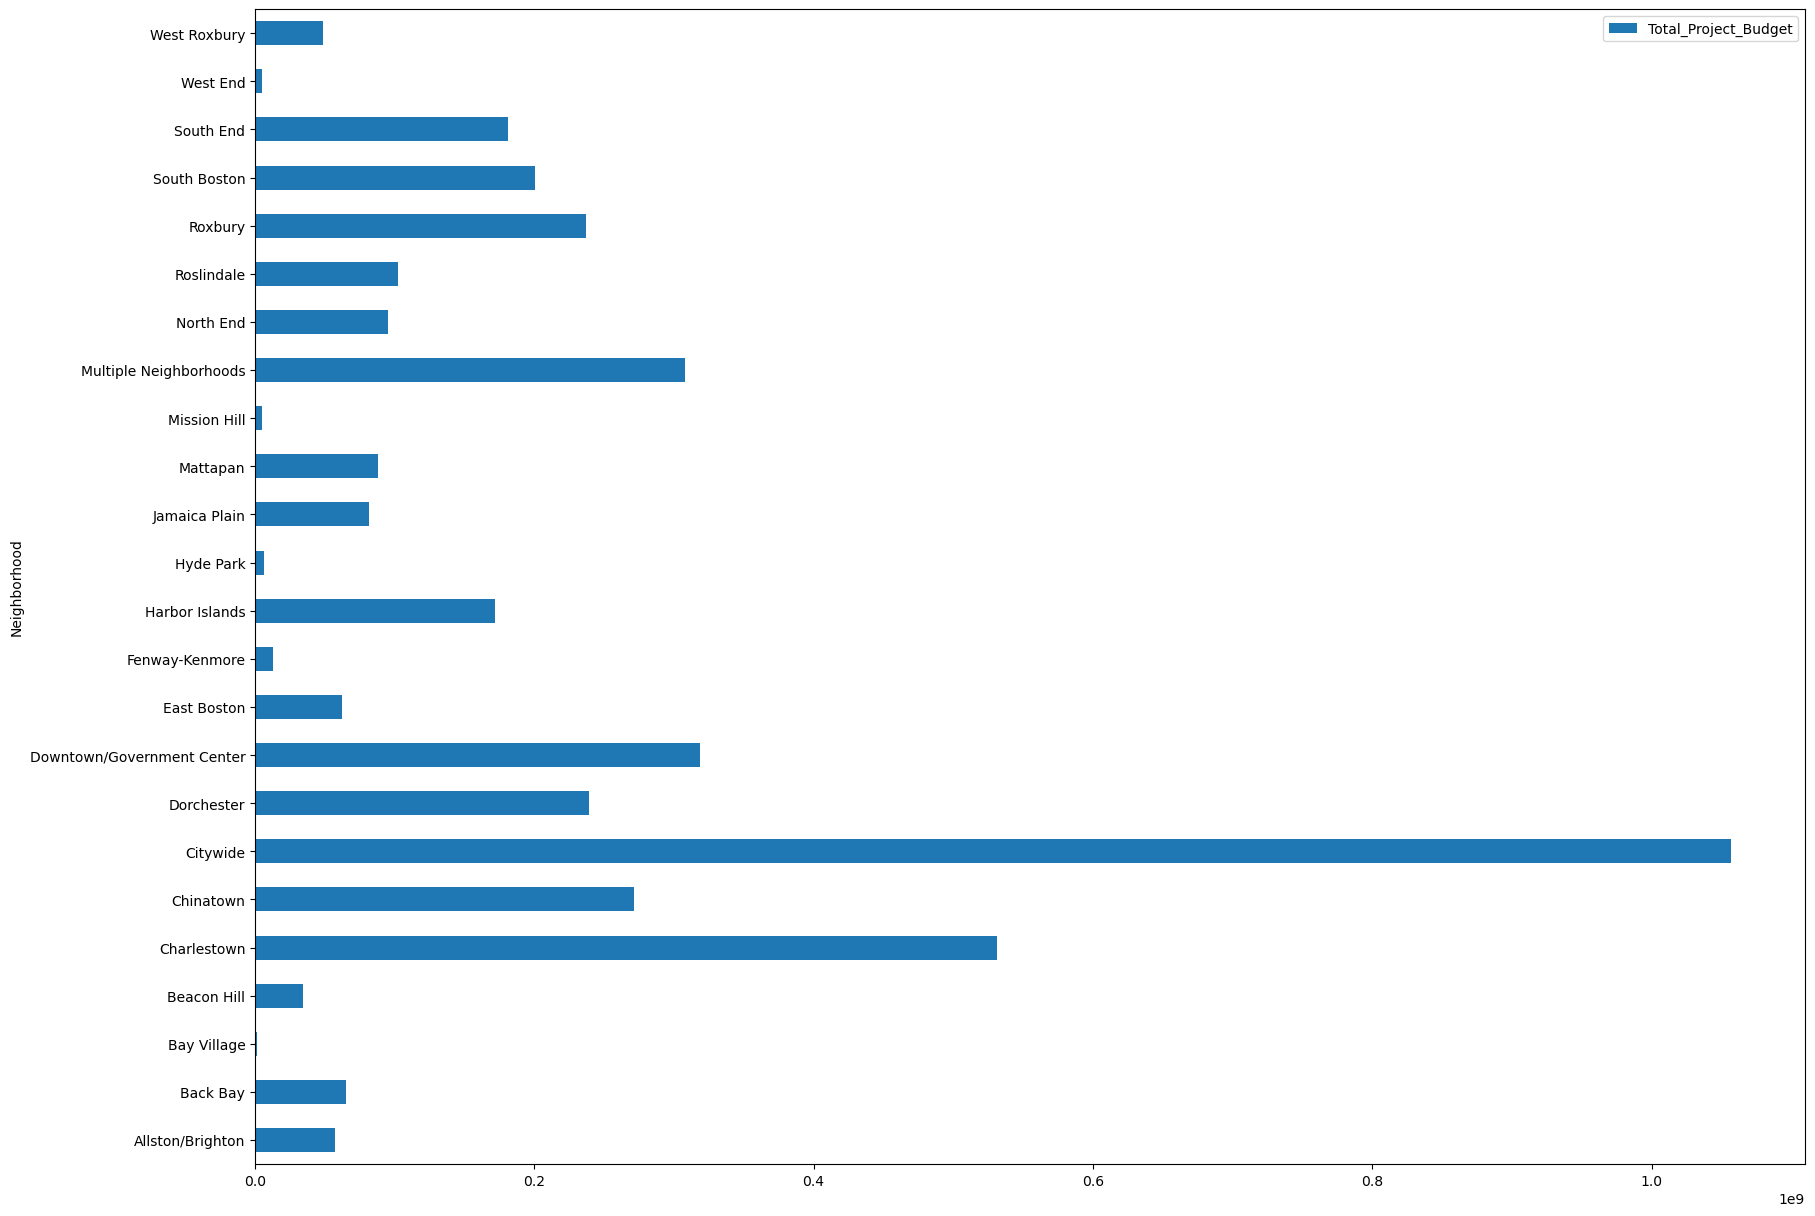

In [7]:
capital_budget_area.plot.barh(x='Neighborhood', y='Total_Project_Budget', figsize=(20,15))

The total budget has a large variation between different areas. For example, Citywide projects have the most spendings, almost double the spending of the second most, Charleston. Perhaps this difference is caused by the area difference, or maybe other factors. This would be an interesting difference to explore.

## 3. Explore the change in expenditure and budget vs. time

### 3.1 Expenditure

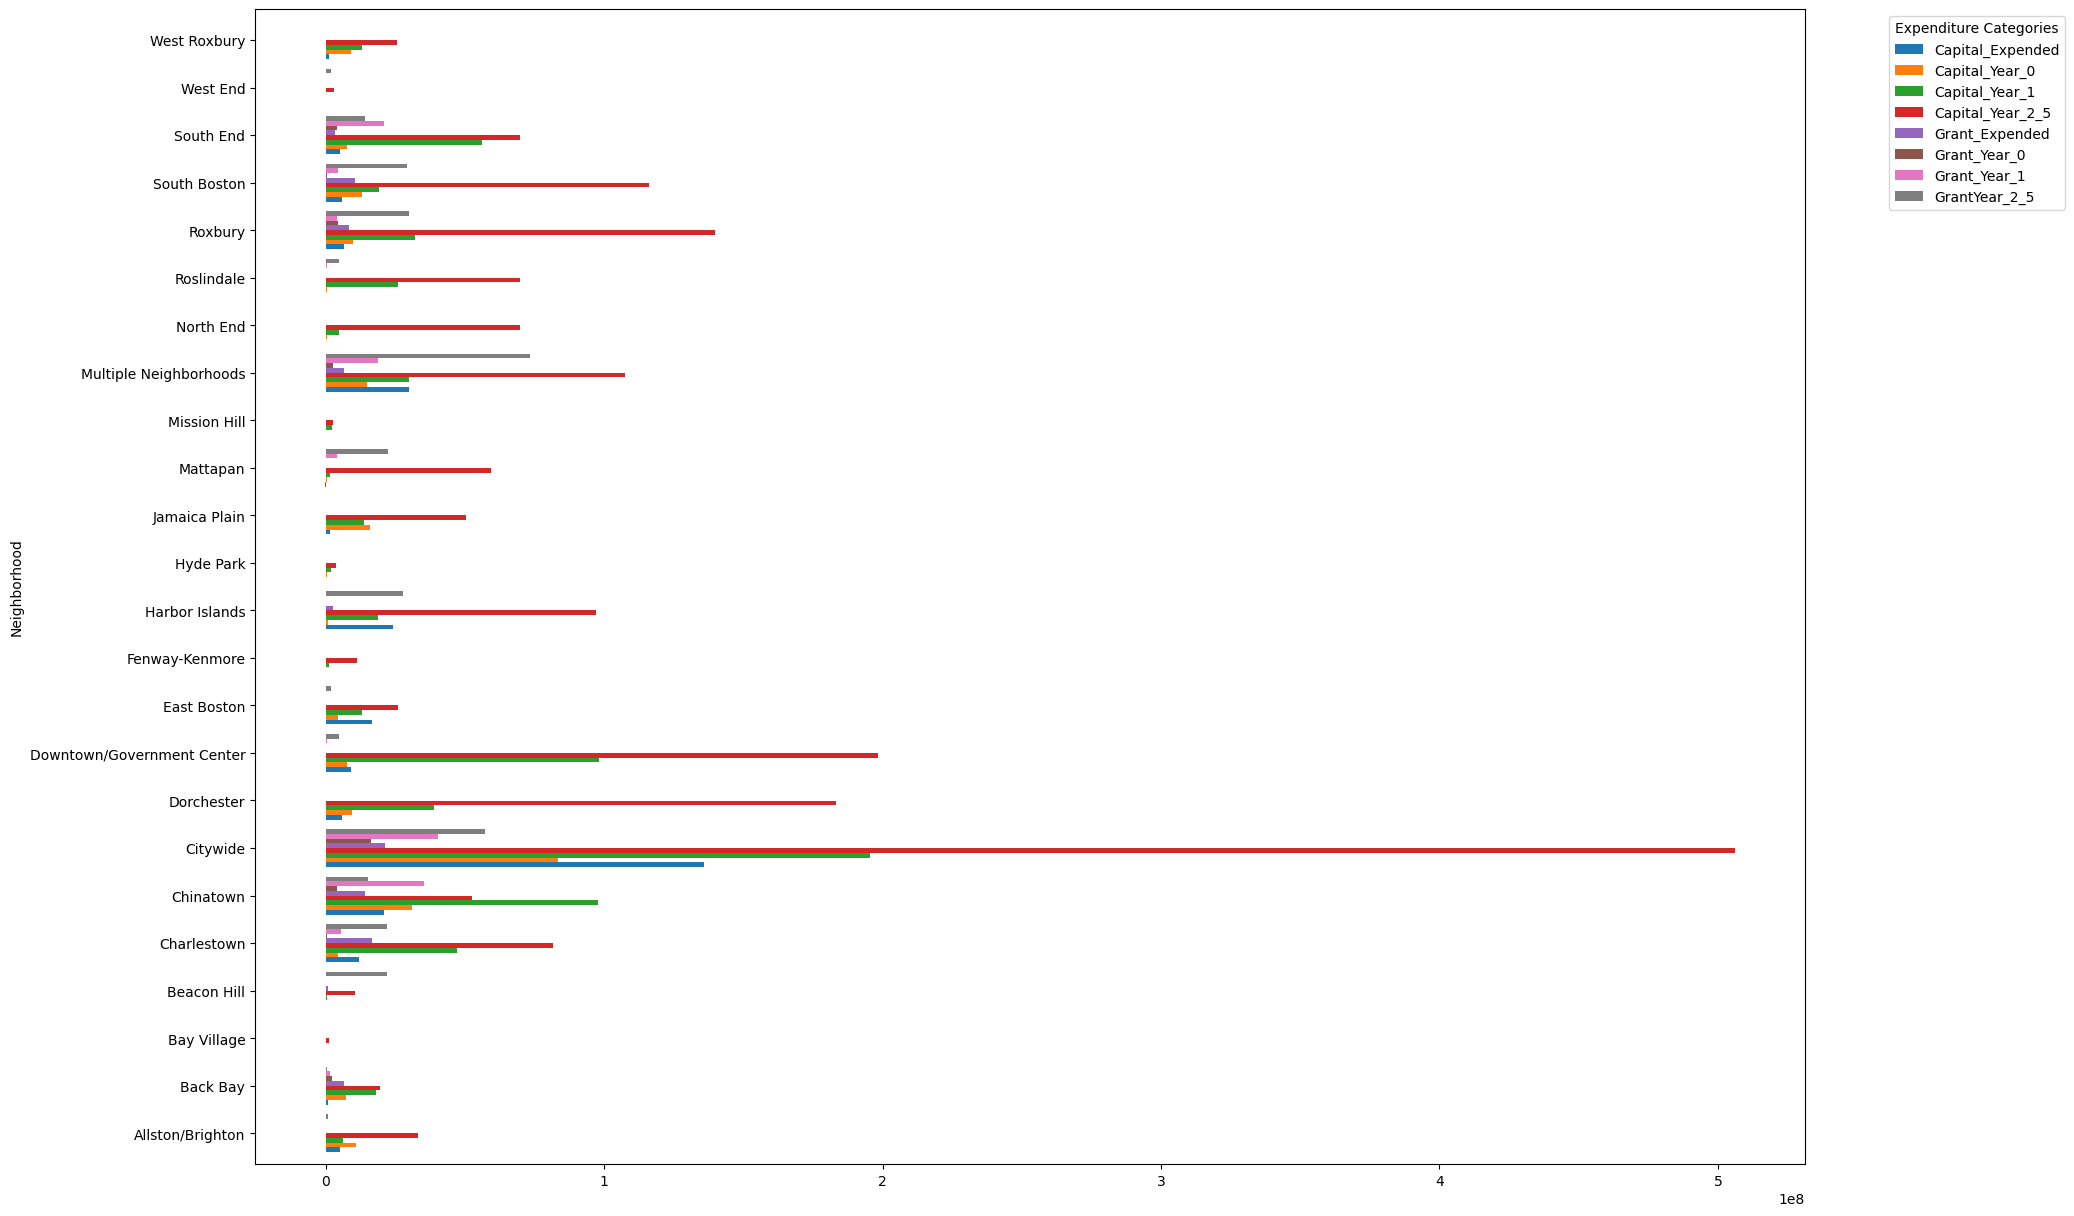

In [8]:
# compare expenditures
expenditure_columns = ['Capital_Expended','Capital_Year_0','Capital_Year_1', 'Capital_Year_2_5', 'Grant_Expended', 'Grant_Year_0','Grant_Year_1', 'GrantYear_2_5']
capital_budget_area.plot.barh(x='Neighborhood', y=expenditure_columns, figsize=(20,15), width=0.8)

plt.legend(title='Expenditure Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The results show that the projected capital expenditure for future years, which is the red bar, is the highest for almost all areas. In general, the amount of capital grant expenditure is less than the amount of capital expenditure in almost all areas, and the projected expenditure for the future is much more than the expenditure for current years (year 0 and 1). For some areas, such as Harbor Islands and East Boston, the prior spendings are more than the spending for current years, while for the majority of areas, the spending for current years are higher than the prior spendings. This potentially indicates that the city has been put more overall fundings into most areas, which indicates that Boston is possibly impoving its infrastrues and basic benefits for the population.

Below is the detailed plot for each category of expenditure:

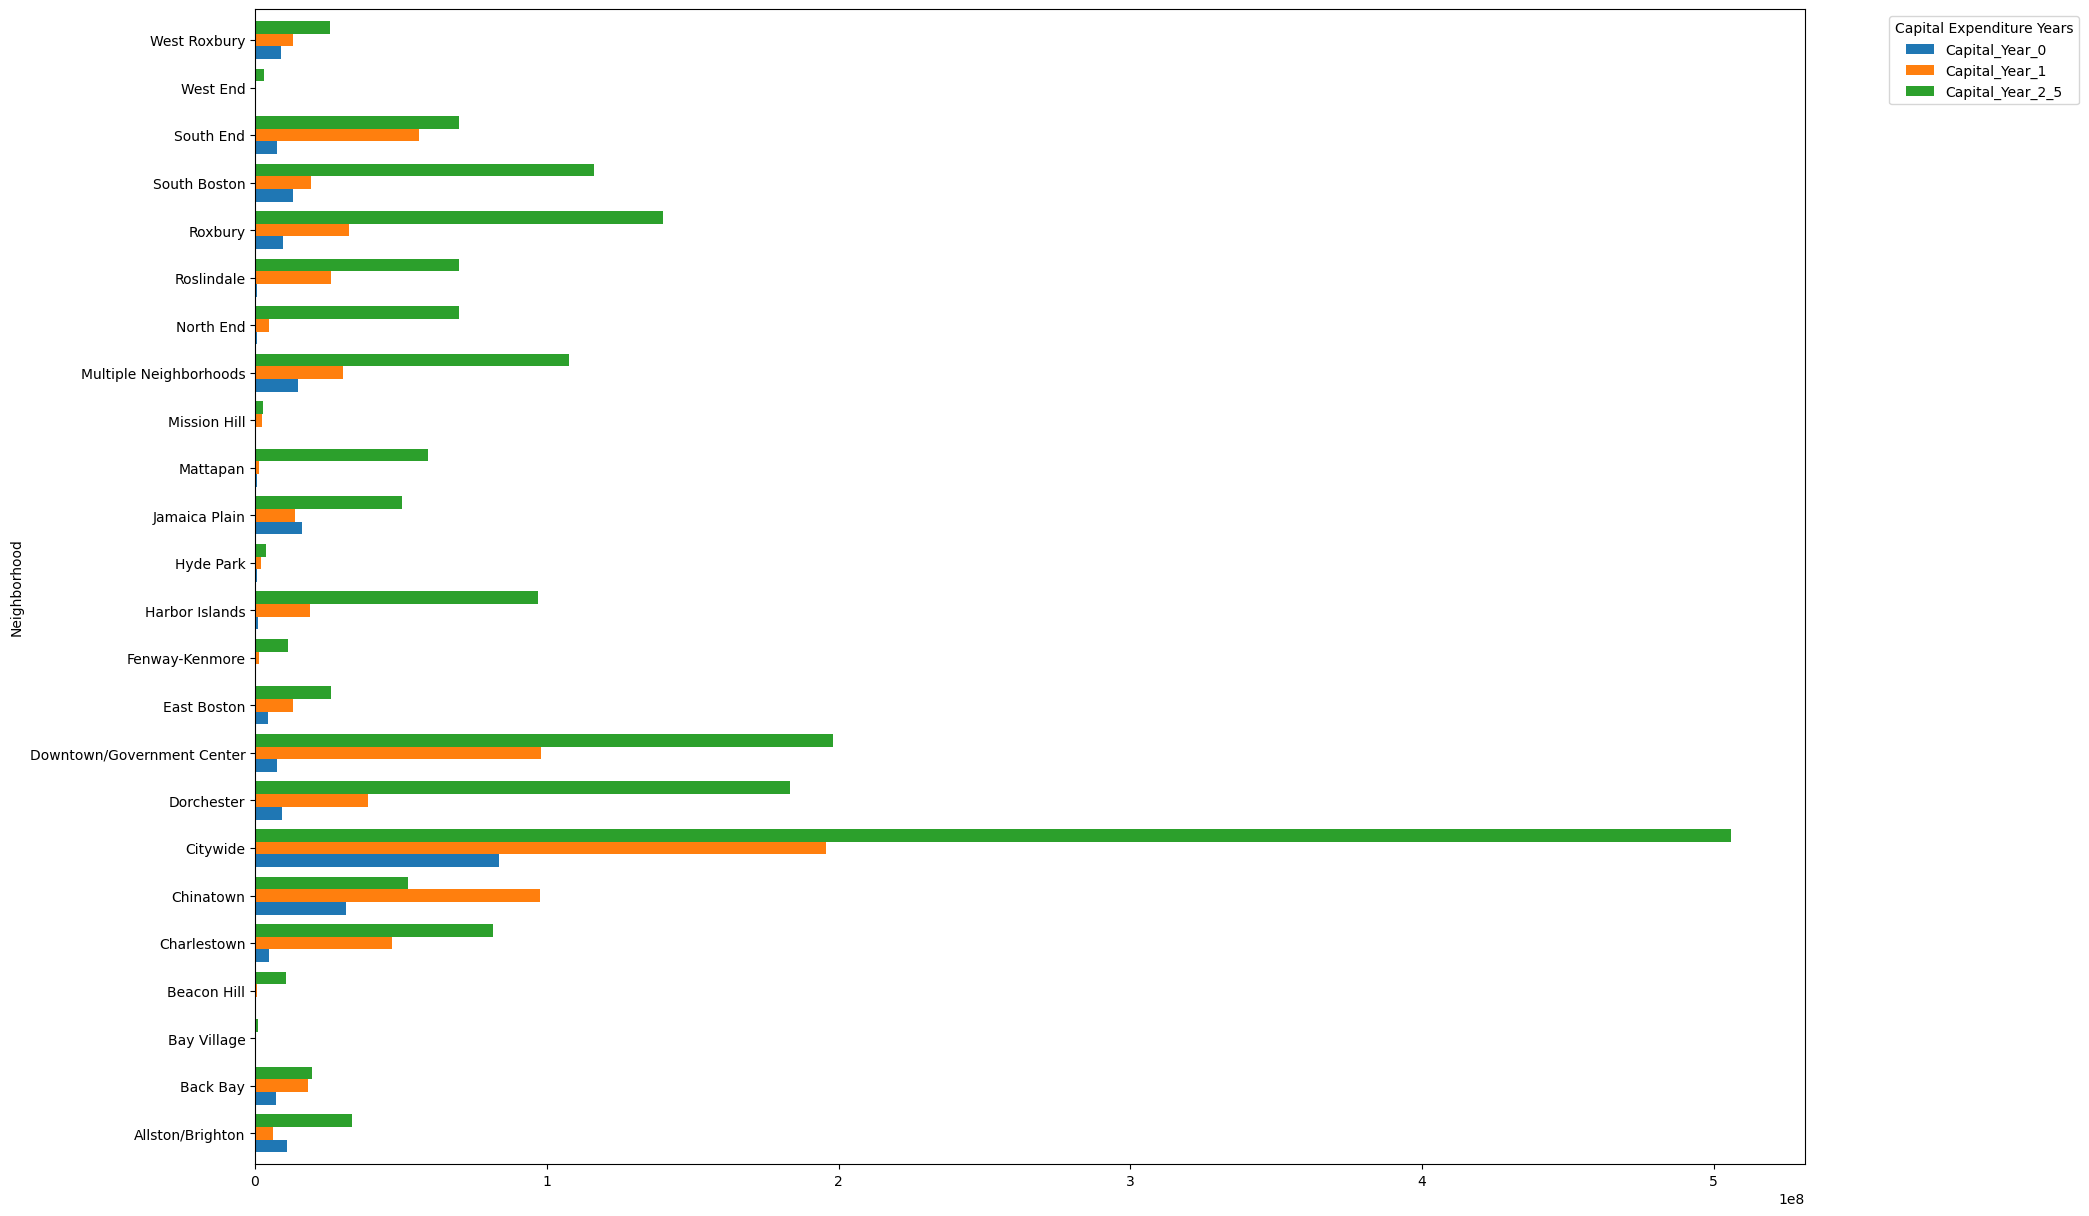

In [9]:
capital_expenditure_columns = ['Capital_Year_0','Capital_Year_1', 'Capital_Year_2_5']
capital_budget_area.plot.barh(x='Neighborhood', y=capital_expenditure_columns, figsize=(20,15), width=0.8)

plt.legend(title='Capital Expenditure Years', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

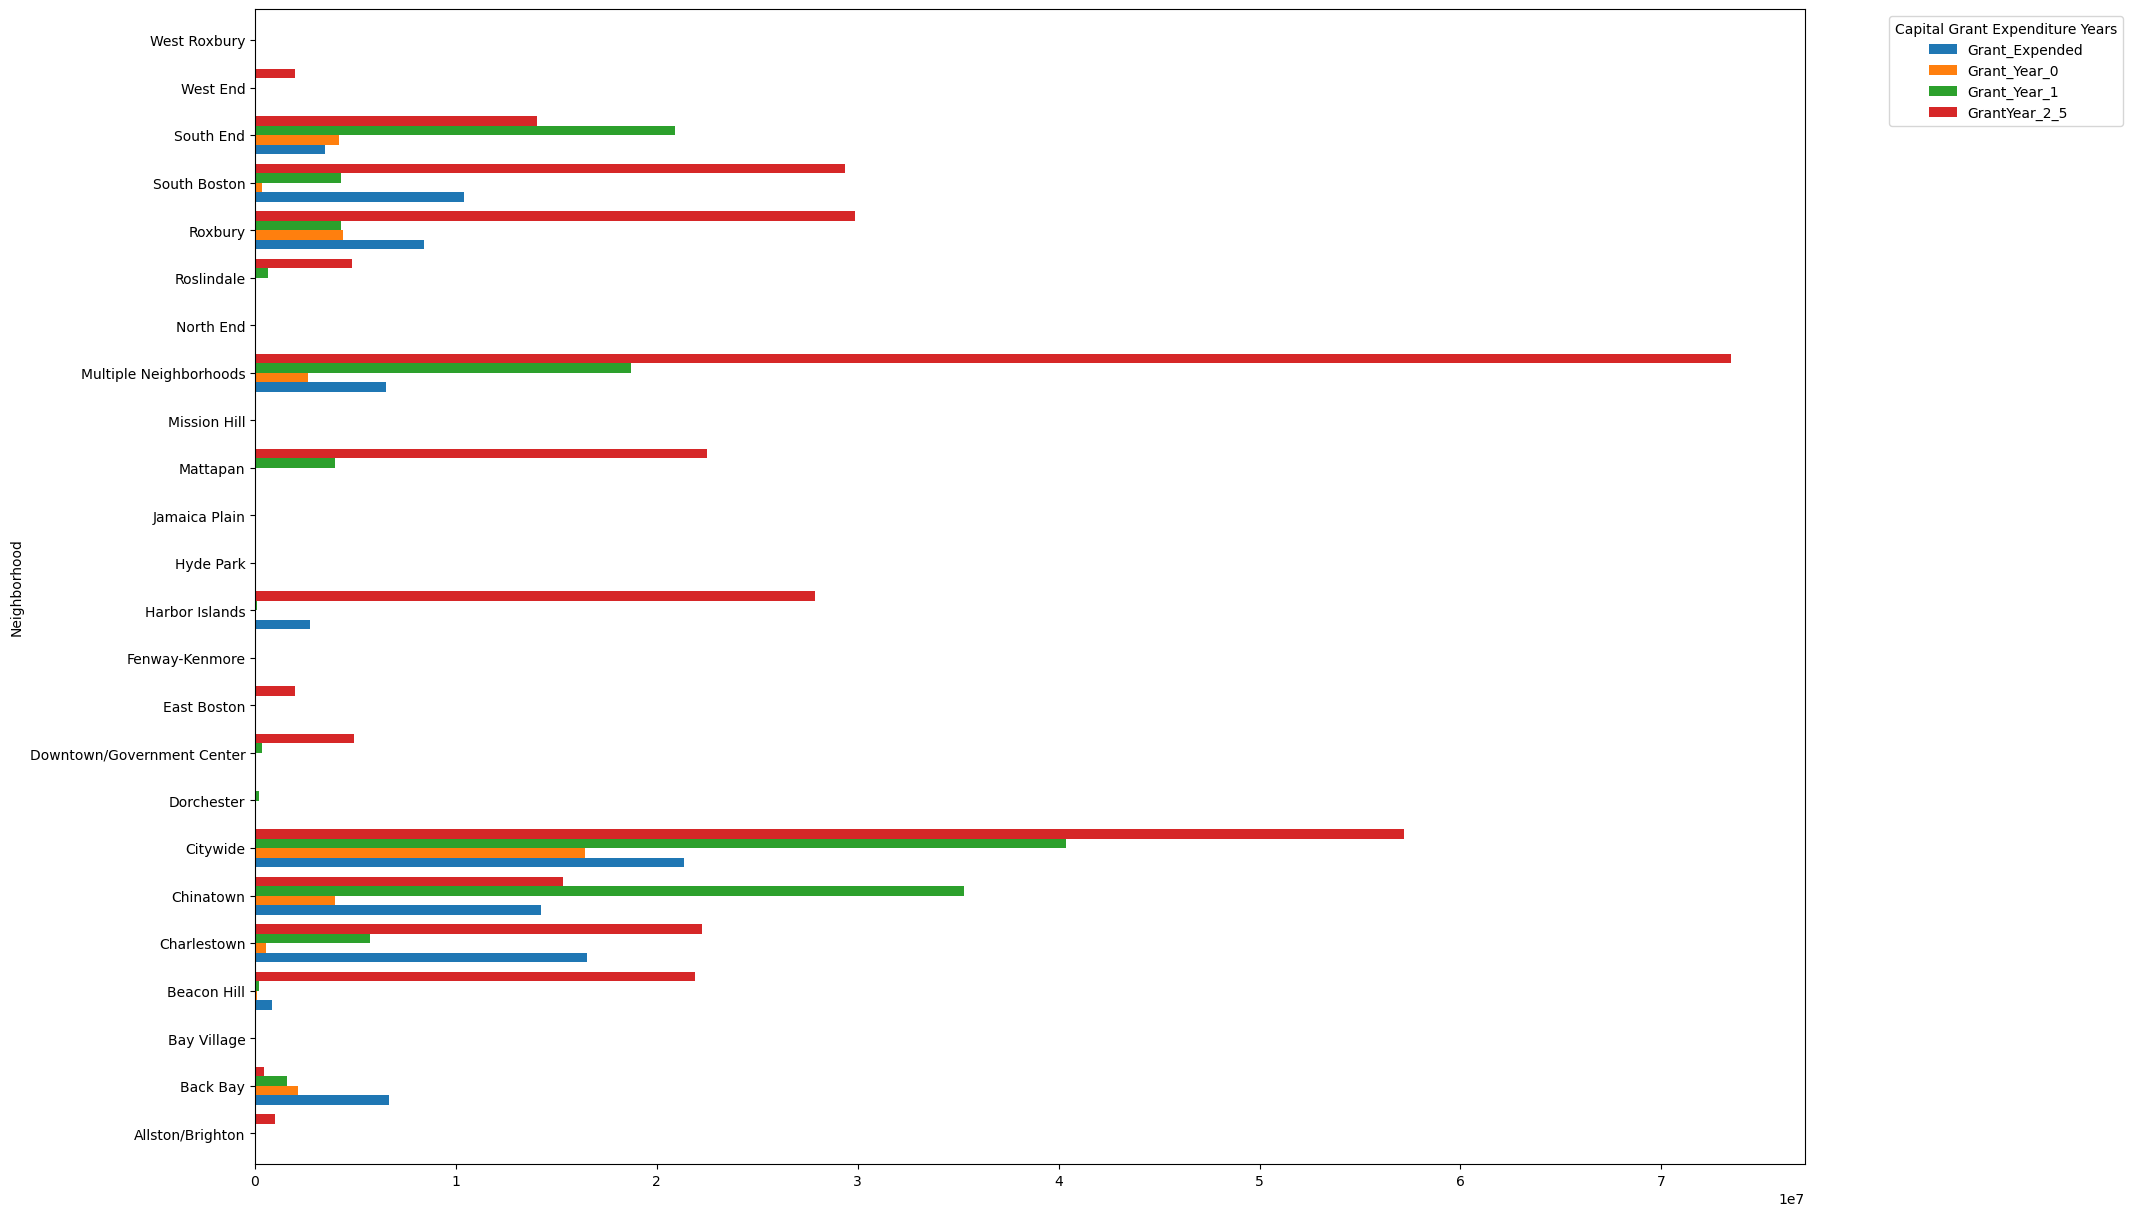

In [10]:
capital_grant_exp_columns = ['Grant_Expended', 'Grant_Year_0','Grant_Year_1', 'GrantYear_2_5']
capital_budget_area.plot.barh(x='Neighborhood', y=capital_grant_exp_columns, figsize=(20,15), width=0.8)

plt.legend(title='Capital Grant Expenditure Years', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

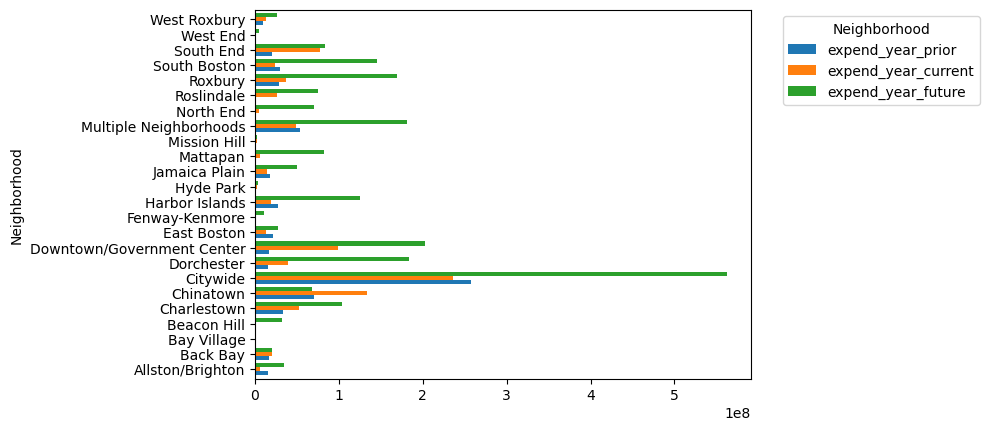

In [11]:
capital_budget_area['expend_year_prior'] = capital_budget_area[['Capital_Year_0', 'Grant_Year_0', 'Capital_Expended', 'Grant_Expended']].sum(axis=1)
capital_budget_area['expend_year_current'] = capital_budget_area[['Capital_Year_1', 'Grant_Year_1']].sum(axis=1)
capital_budget_area['expend_year_future'] = capital_budget_area[['Capital_Year_2_5', 'GrantYear_2_5']].sum(axis=1)

capital_budget_area[['Neighborhood', 'expend_year_prior', 'expend_year_current', 'expend_year_future']].plot.barh(x='Neighborhood',  width=0.8)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

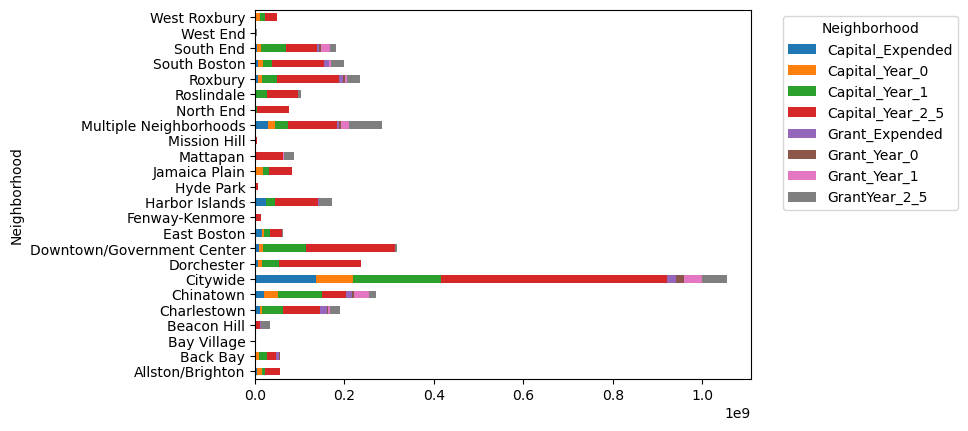

In [12]:
capital_budget_area[expenditure_columns + ['Neighborhood']].groupby('Neighborhood').sum().plot(kind='barh',stacked=True)

plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Again, expenditure for almost all areas (except for Chinatown) are through future expenditures.

### 3.2 Budget

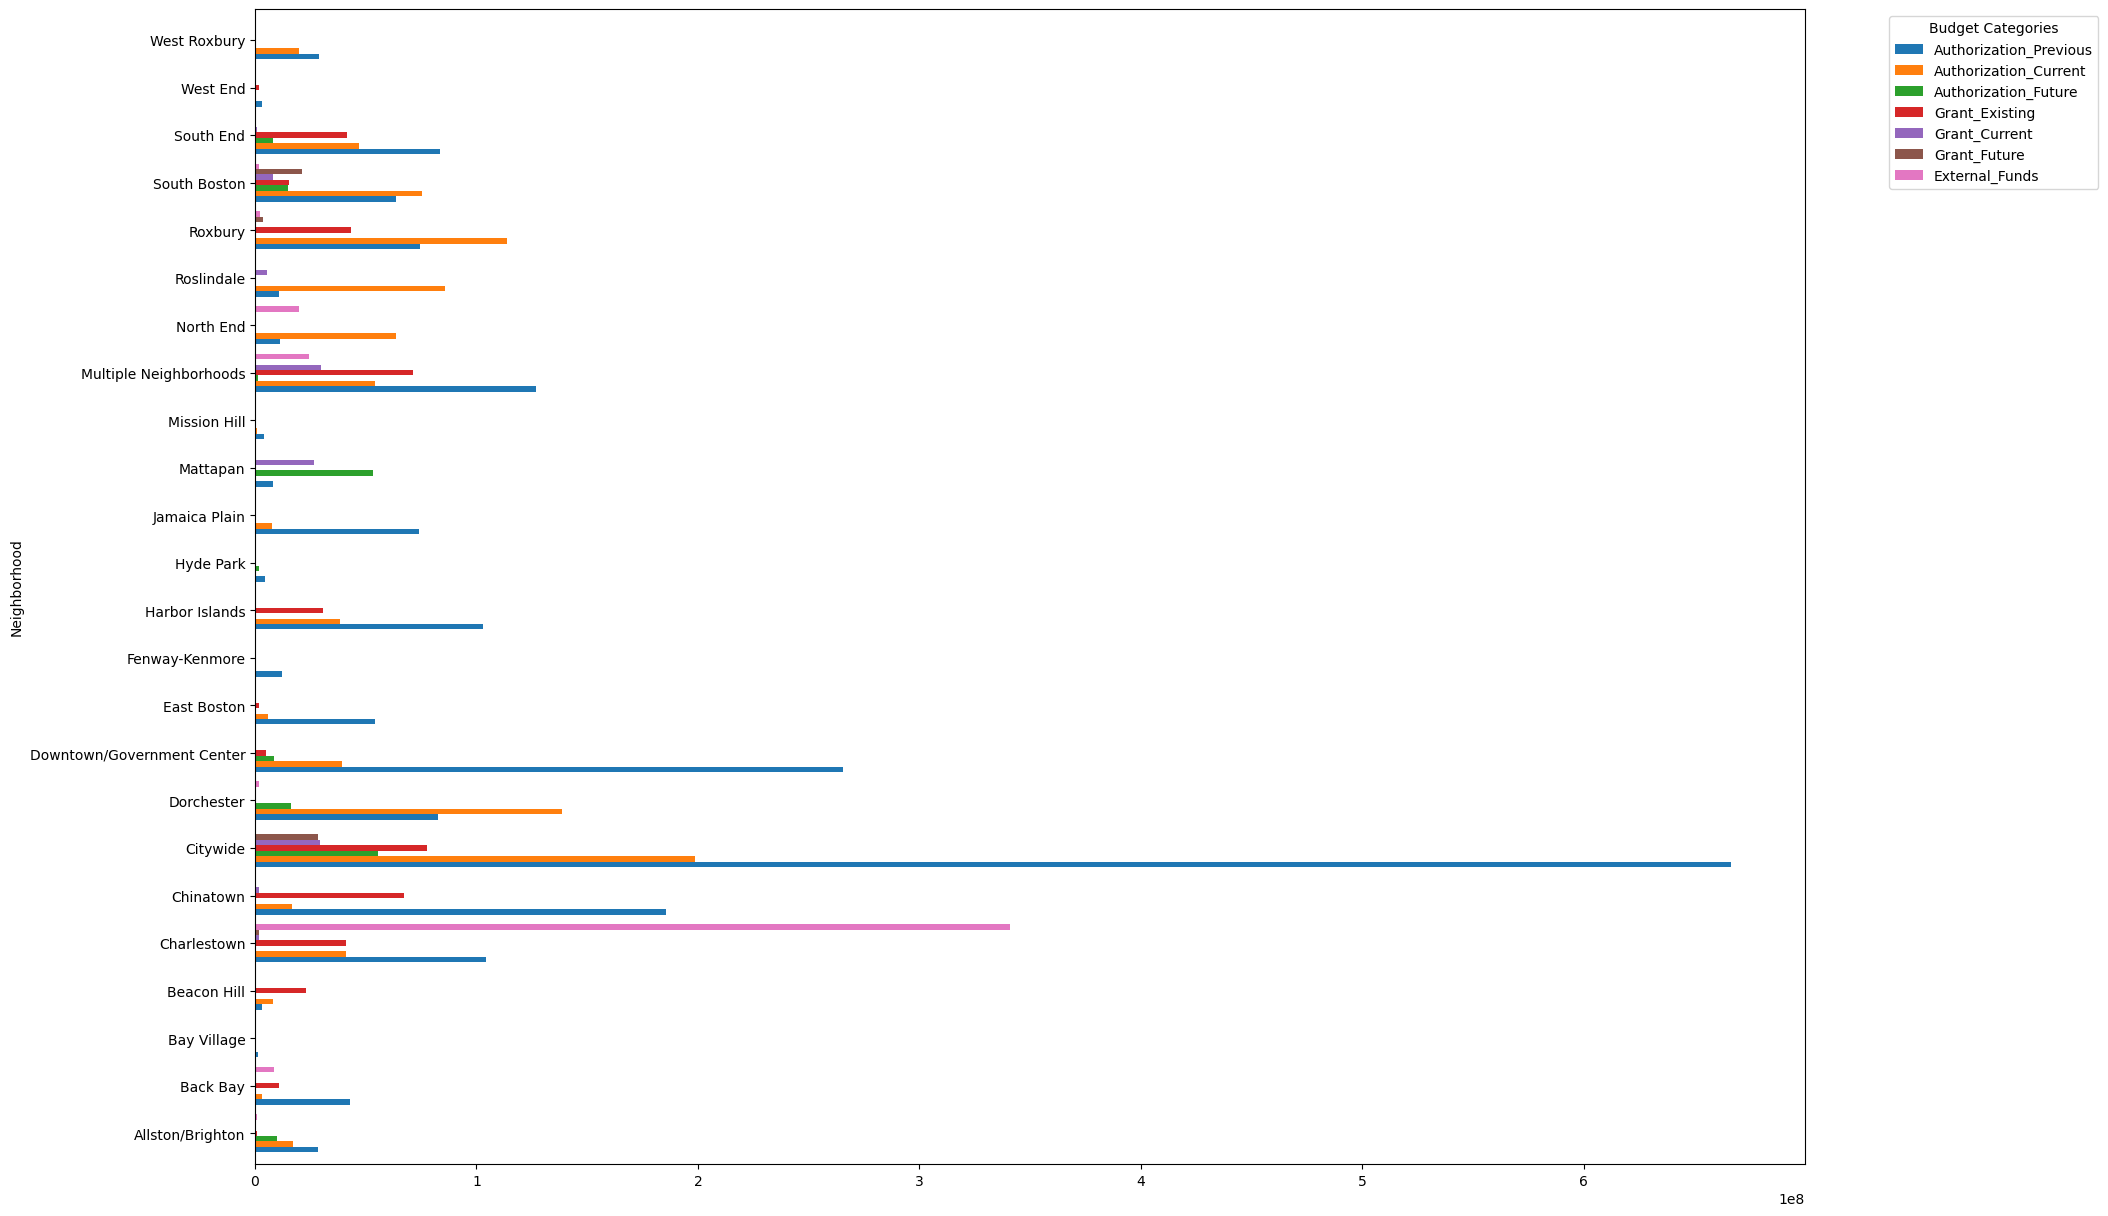

In [13]:
# compare budgets
budget_columns = ['Authorization_Previous',
       'Authorization_Current', 'Authorization_Future', 'Grant_Existing',
       'Grant_Current', 'Grant_Future', 'External_Funds']
capital_budget_area.plot.barh(x='Neighborhood', y=budget_columns, figsize=(20,15), width=0.8)

plt.legend(title='Budget Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


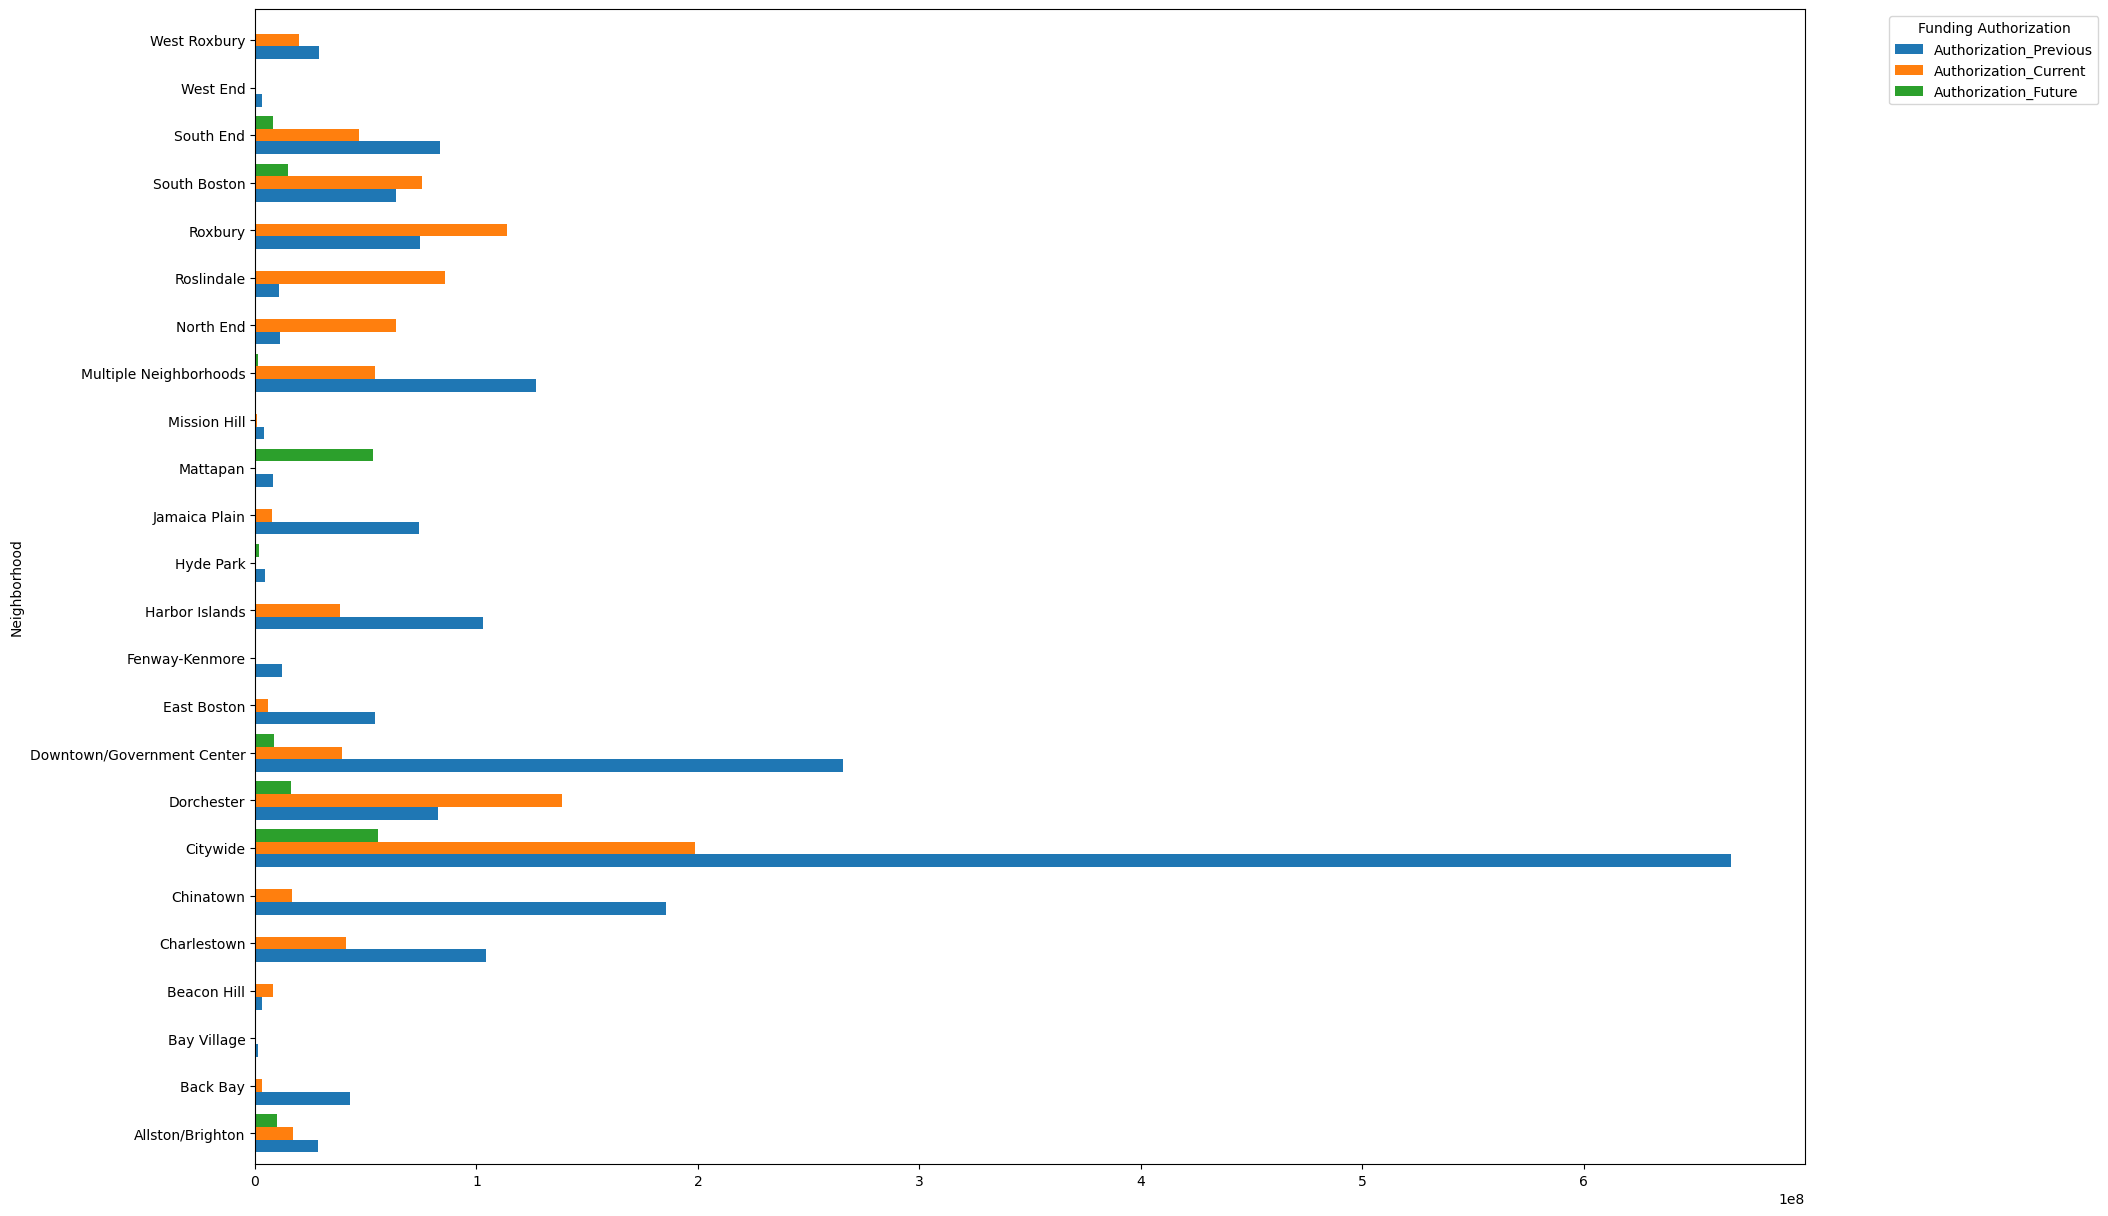

In [14]:
auth_budget_columns = ['Authorization_Previous',
       'Authorization_Current', 'Authorization_Future']
capital_budget_area.plot.barh(x='Neighborhood', y=auth_budget_columns, figsize=(20,15), width=0.8)

plt.legend(title='Funding Authorization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

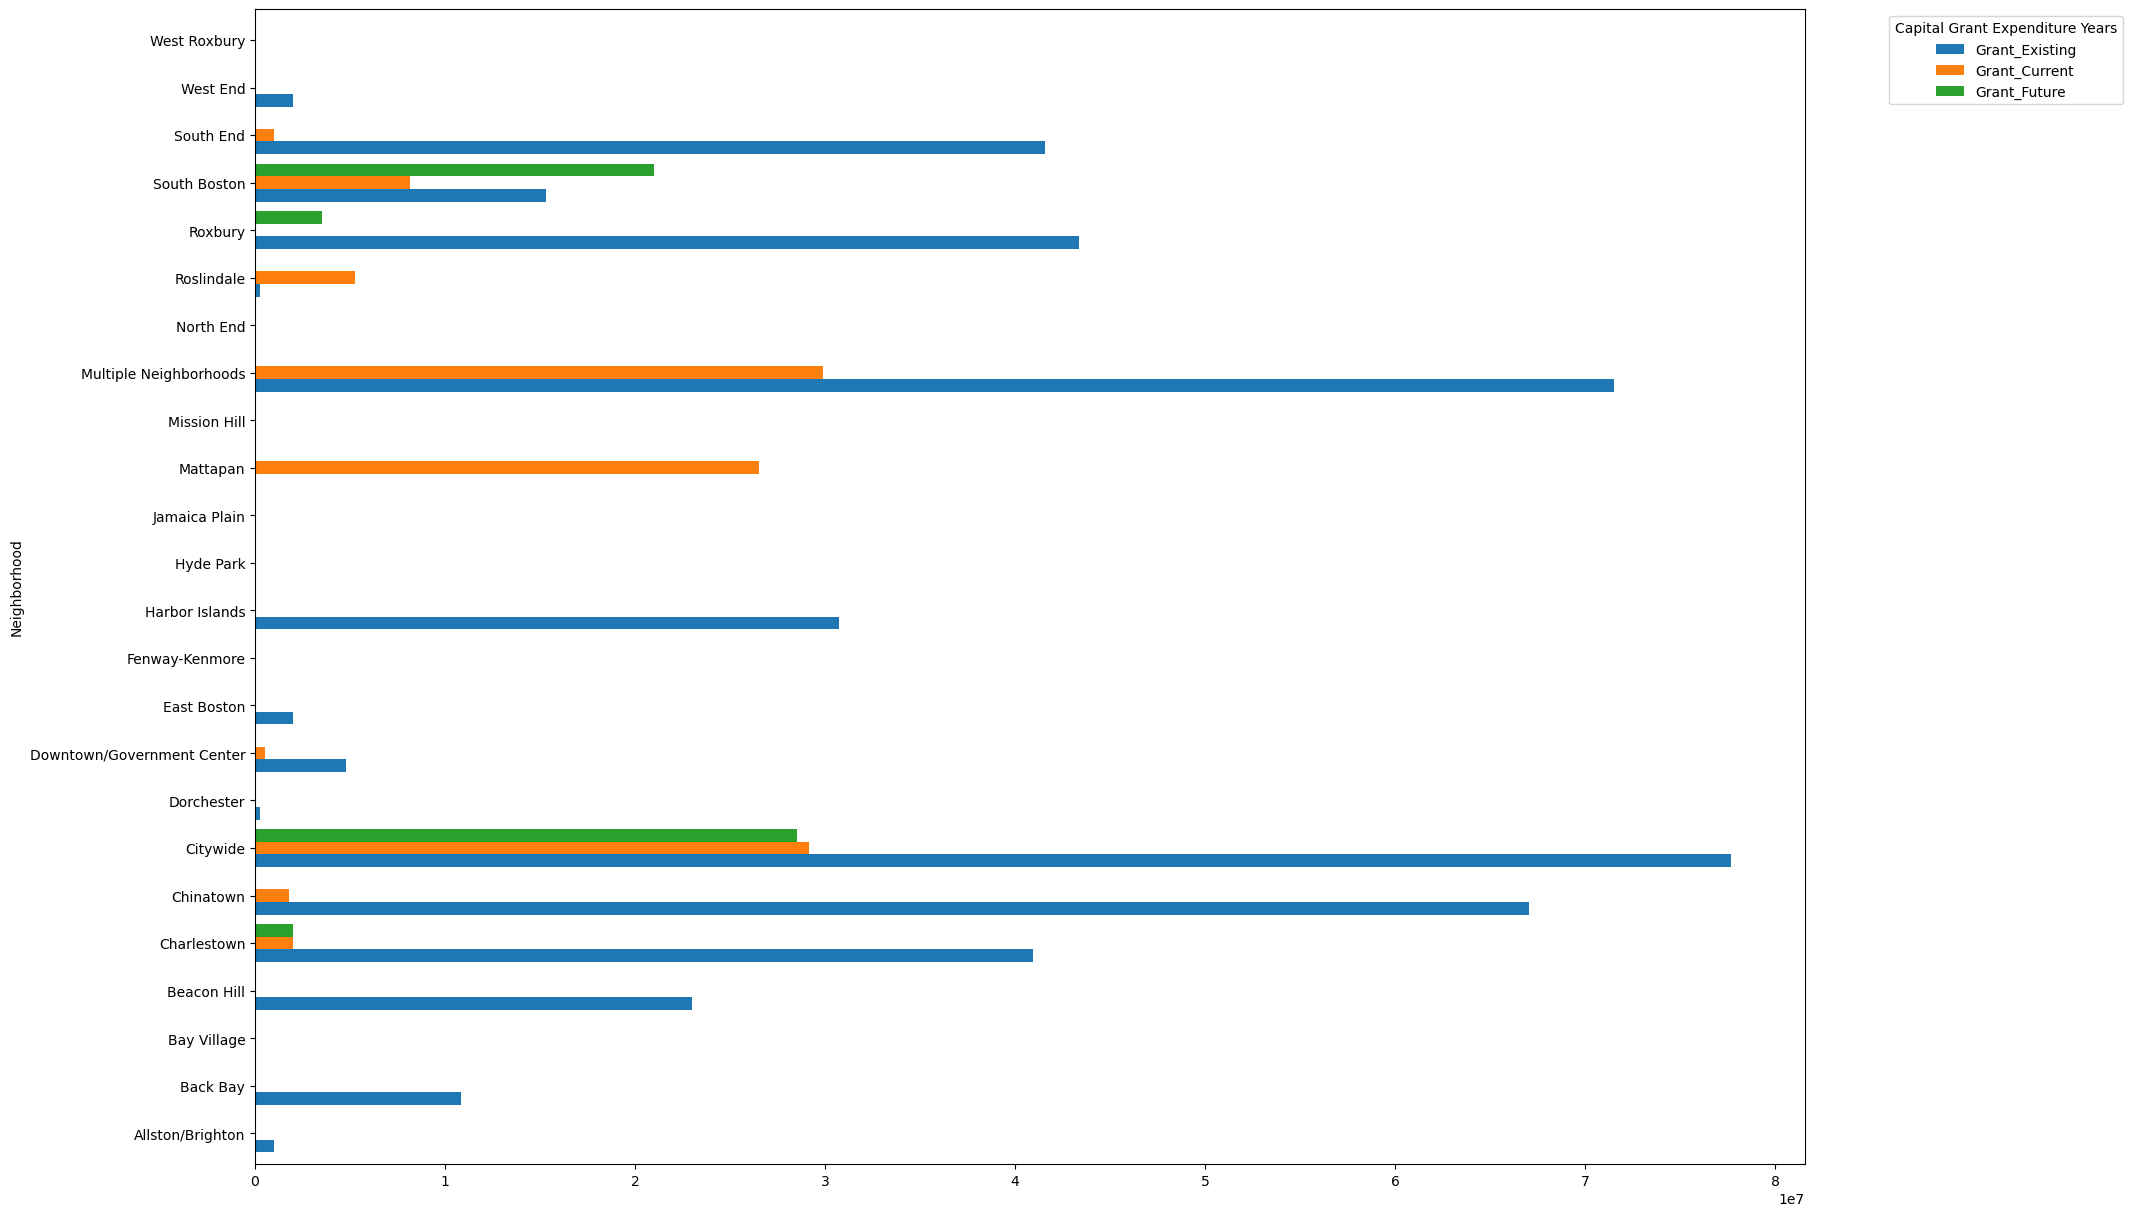

In [15]:
capital_grant_budget_columns = ['Grant_Existing', 'Grant_Current', 'Grant_Future']
capital_budget_area.plot.barh(x='Neighborhood', y=capital_grant_budget_columns , figsize=(20,15), width=0.8)

plt.legend(title='Capital Grant Expenditure Years', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

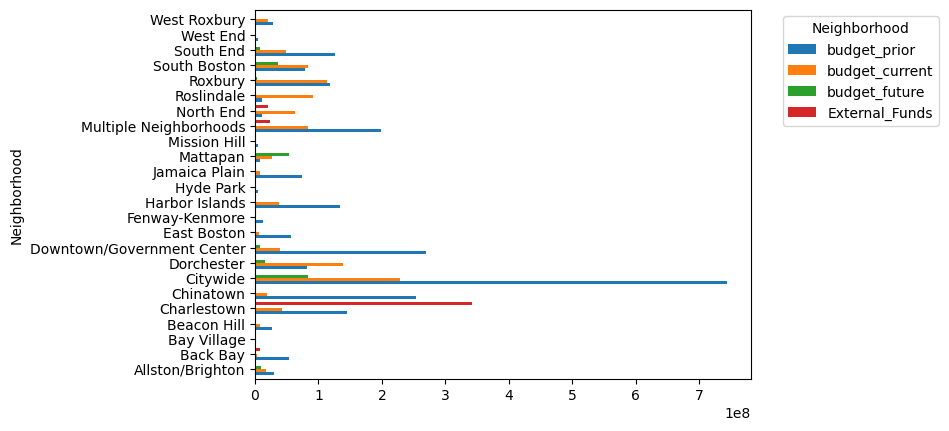

In [16]:
capital_budget_area['budget_prior'] = capital_budget_area[['Grant_Existing', 'Authorization_Previous']].sum(axis=1)
capital_budget_area['budget_current'] = capital_budget_area[['Grant_Current', 'Authorization_Current']].sum(axis=1)
capital_budget_area['budget_future'] = capital_budget_area[['Grant_Future', 'Authorization_Future']].sum(axis=1)

capital_budget_area[['Neighborhood', 'budget_prior', 'budget_current', 'budget_future', 'External_Funds']].plot.barh(x='Neighborhood',  width=0.8)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

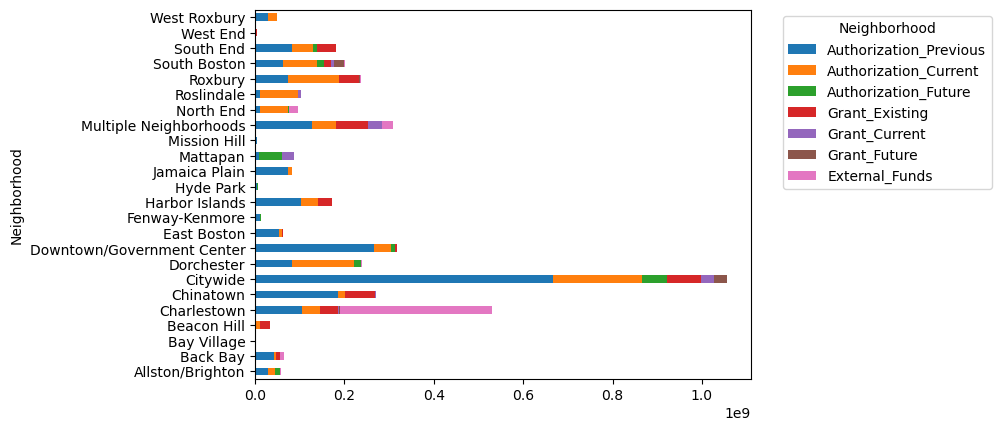

In [17]:
capital_budget_area[budget_columns + ['Neighborhood']].groupby('Neighborhood').sum().plot(kind='barh',stacked=True)

plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Unlike expenditure, most of the budget for most of the areas are allocated already through prior funding authorizations or grant authorizations. There are a couple of exceptions here, one is Mattapan, which has its most budgets are future funding authorizations, meaning perhaps it is an area that is developing. Another area is Charlestown, which has received most of its budget through external fundings instead of capital budget.

### 3.3 Interesting Areas

Which areas has/will have the most expenditure and budget?

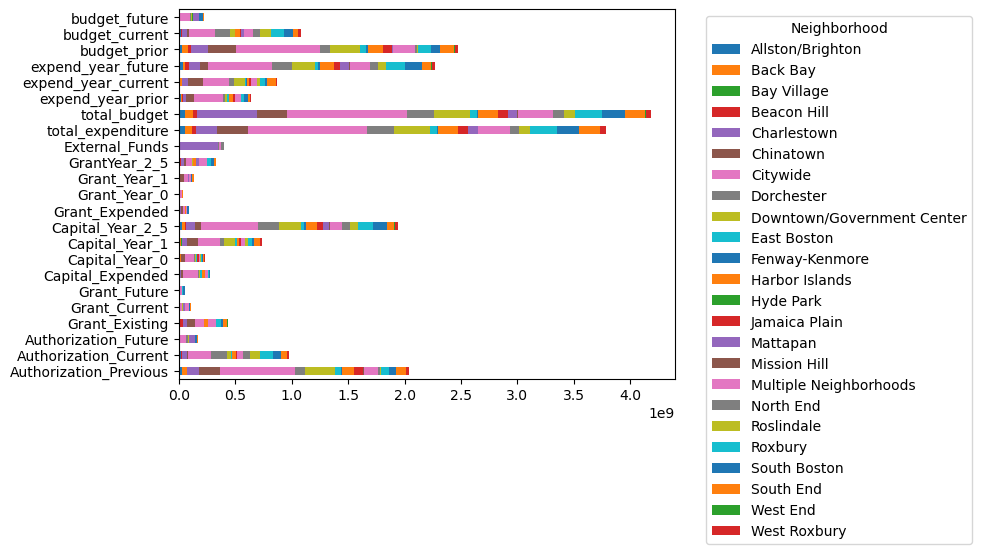

In [18]:
capital_budget_area.drop(columns="Total_Project_Budget").groupby('Neighborhood').sum().transpose().plot(kind='barh',stacked=True)

plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The plot shows that the majority of future fundings would go to Citywide projects; Dorchester and Roslindale are the single areas that would have the most expenditures. Charlestown is the single area that received the mojority of the externel funds, which would be interesting to find the reason.

## 4. Compare budget and expenditure

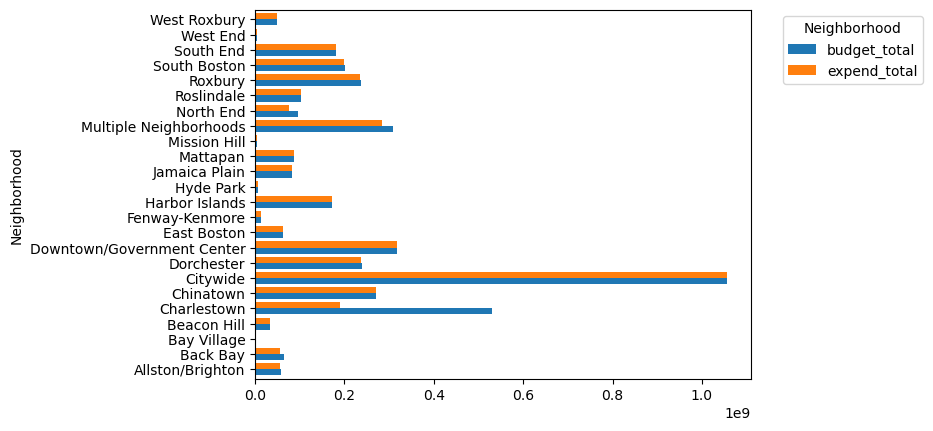

In [19]:
capital_budget_area['budget_total'] = capital_budget_area[['budget_prior', 'budget_current', 'budget_future', 'External_Funds']].sum(axis=1)
capital_budget_area['expend_total'] = capital_budget_area[['expend_year_prior', 'expend_year_current', 'expend_year_future']].sum(axis=1)

capital_budget_area[['Neighborhood', 'budget_total', 'expend_total']].plot.barh(x='Neighborhood',  width=0.8)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

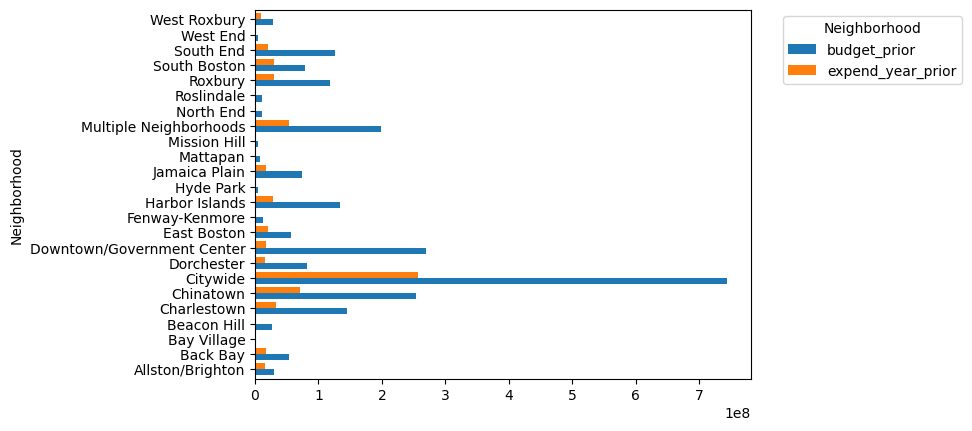

In [20]:
capital_budget_area[['Neighborhood', 'budget_prior', 'expend_year_prior']].plot.barh(x='Neighborhood',  width=0.8)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

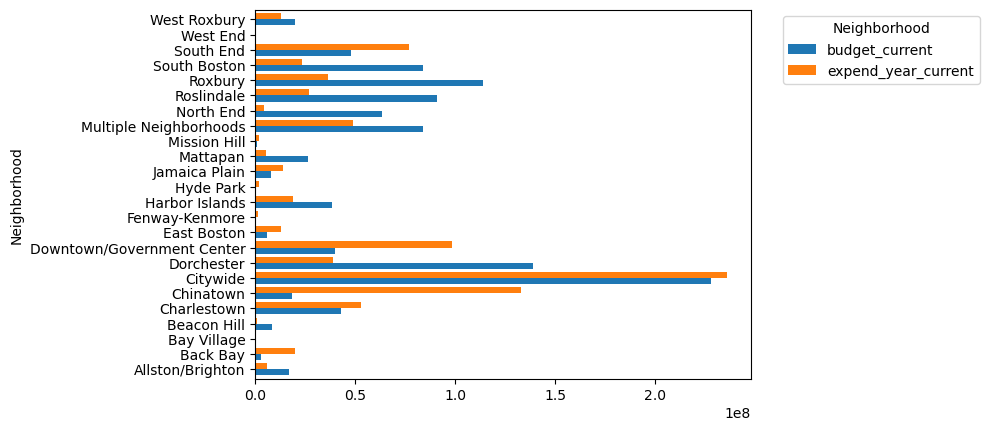

In [21]:
capital_budget_area[['Neighborhood', 'budget_current', 'expend_year_current']].plot.barh(x='Neighborhood',  width=0.8)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

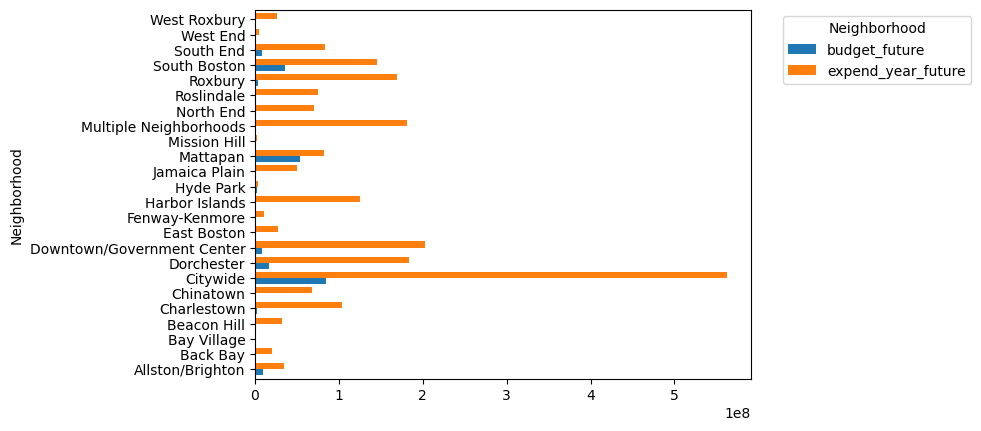

In [22]:
capital_budget_area[['Neighborhood', 'budget_future', 'expend_year_future']].plot.barh(x='Neighborhood',  width=0.8)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The results show that the total amount of projected spending (budget) is at least the total amount of the expenditure. However, they are distributed differently. The budget are mostly set in the prior years for all areas, while the spending would occur in the future years instead. This means that the budgeting projects are long term projects, and possibly many of them are going longer than they were initially planned.

## 5. Explore the per captica budget and expenditure

The population census data used here is from https://data.boston.gov/dataset/2020-census-for-boston/resource/5800a0a2-6acd-41a3-9fe0-1bf7b038750d.

### Modify the dataset

In [83]:
census_neighborhood = pd.read_csv('data/neighborhood_census.csv')
census_neighborhood.head()

,tract20_nbhd,P0020001,P0020005,P0020006,P0020002,P002aapi,P002others,P0040001,P0040005,P0040006,...,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010,H0010001,H0010002,H0010003,hhsize
0,field concept,Total:,White alone,Black or African American alone,Hispanic or Latino,"Asian, Native Hawaiian and Pacific Islander al...","Other Races or Multiple Races, all ages",Total:,White alone,Black or African American alone,...,Nursing facilities/Skilled-nursing facilities,Other institutional facilities,Noninstitutionalized population:,College/University student housing,Military quarters,Other noninstitutional facilities,Total:,Occupied,Vacant,household size
1,Allston,24904,12536,1326,3259,6271,1512,23140,11976,1184,...,0,0,3281,3214,0,67,10748,10027,721,2.156477511
2,Back Bay,18190,13065,690,1208,2410,817,17042,12349,641,...,269,0,1610,1487,0,123,11524,10006,1518,1.630121927
3,Beacon Hill,9336,7521,252,537,630,396,8603,6980,231,...,0,0,33,0,0,33,6037,5485,552,1.696080219
4,Brighton,52047,32694,2414,5376,8703,2860,47657,30752,2076,...,266,56,3796,3493,0,303,23653,22535,1118,2.126292434


In [84]:
census_neighborhood = census_neighborhood.iloc[1:]
census_neighborhood['P0020001'] = pd.to_numeric(census_neighborhood['P0020001'])
census_neighborhood.rename(columns={'tract20_nbhd': 'Neighborhood', 'P0020001': 'Population'}, inplace=True)

neighborhood_pop = census_neighborhood.groupby('Neighborhood')['Population'].sum()
neighborhood_pop

Neighborhood
Allston                     24904
Back Bay                    18190
Beacon Hill                  9336
Brighton                    52047
Charlestown                 19120
Chinatown                    6211
Dorchester                 122191
Downtown                    13768
East Boston                 43066
Fenway                      37493
Hyde Park                   34172
Jamaica Plain               40015
Longwood                     5186
Mattapan                    23840
Mission Hill                17518
North End                   10805
Roslindale                  29586
Roxbury                     54533
South Boston                37917
South Boston Waterfront      5579
South End                   30904
West End                     7705
West Roxbury                31561
Name: Population, dtype: int64

In [85]:
neighborhood_pop_df = neighborhood_pop.reset_index()
neighborhood_pop_df.columns = ['Neighborhood', 'Population']

In [86]:
neighborhood_pop_df['Neighborhood'] = neighborhood_pop_df['Neighborhood'].replace(['Allston', 'Brighton'], 'Allston/Brighton')
neighborhood_pop_df['Neighborhood'] = neighborhood_pop_df['Neighborhood'].replace(['Downtown'], 'Downtown/Government Center')
neighborhood_pop_df['Neighborhood'] = neighborhood_pop_df['Neighborhood'].replace(['South Boston Waterfront'], 'South Boston')
neighborhood_pop_df['Neighborhood'] = neighborhood_pop_df['Neighborhood'].replace(['Fenway'], 'Fenway-Kenmore')
combined_population_df = neighborhood_pop_df.groupby('Neighborhood')['Population'].sum().reset_index()
citywide_population = combined_population_df['Population'].sum()
combined_population_df = combined_population_df.append({'Neighborhood': 'Citywide', 'Population': citywide_population}, ignore_index=True)
combined_population_df


C:\Users\Wanchen Hong\AppData\Local\Temp\ipykernel_7024\2586778466.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_population_df = combined_population_df.append({'Neighborhood': 'Citywide', 'Population': citywide_population}, ignore_index=True)


,Neighborhood,Population
0,Allston/Brighton,76951
1,Back Bay,18190
2,Beacon Hill,9336
3,Charlestown,19120
4,Chinatown,6211
5,Dorchester,122191
6,Downtown/Government Center,13768
7,East Boston,43066
8,Fenway-Kenmore,37493
9,Hyde Park,34172


In [82]:
capital_budget_area

,Neighborhood,Authorization_Previous,Authorization_Current,Authorization_Future,Grant_Existing,Grant_Current,Grant_Future,Capital_Expended,Capital_Year_0,Capital_Year_1,...,total_expenditure,total_budget,expend_year_prior,expend_year_current,expend_year_future,budget_prior,budget_current,budget_future,budget_total,expend_total
0,Allston/Brighton,28535000,17050000,10000000,1000000,0,0,5174971,10825558,6222448,...,56585000,57605000,16000529,6222448,34362023,29535000,17050000,10000000,57605000,56585000
1,Back Bay,42980000,3100000,0,10862299,0,0,927943,7250000,18300000,...,56942299,65442299,17009094,19900000,20033205,53842299,3100000,0,65442299,56942299
2,Bay Village,1355000,0,0,0,0,0,5758,25000,225000,...,1355000,1525000,30758,225000,1099242,1355000,0,0,1525000,1355000
3,Beacon Hill,3100000,8310000,0,23000000,0,0,0,100000,700000,...,34410000,34410000,1013432,875000,32521568,26100000,8310000,0,34410000,34410000
4,Charlestown,104181468,41000000,0,40963403,2000000,2000000,11844549,4630574,47050000,...,190144871,531212390,33511441,52750000,103883430,145144871,43000000,2000000,531212390,190144871
5,Chinatown,185796206,16600000,0,67075966,1800000,0,21037112,31155000,97700000,...,271272172,271272172,70436737,133000000,67835435,252872172,18400000,0,271272172,271272172
6,Citywide,666561363,198835854,55663014,77697970,29158694,28500000,135926682,83575658,195589313,...,1056416895,1056966895,257282037,235964313,563170545,744259333,227994548,84163014,1056966895,1056416895
7,Dorchester,82416239,138715000,16300000,250000,60000,0,5849807,9354590,38882743,...,237741239,239411239,15254397,39092743,183394099,82666239,138775000,16300000,239411239,237741239
8,Downtown/Government Center,265350000,39280000,8500000,4785000,500000,0,9217678,7559489,98098434,...,318415000,318415000,16777167,98448434,203189399,270135000,39780000,8500000,318415000,318415000
9,East Boston,54051890,5760000,0,2000000,0,0,16625527,4332386,12960000,...,61811890,62457890,20957913,12960000,27893977,56051890,5760000,0,62457890,61811890


In [87]:
joined_df = combined_population_df.merge(capital_budget_area, on='Neighborhood', how='inner')
joined_df

,Neighborhood,Population,Authorization_Previous,Authorization_Current,Authorization_Future,Grant_Existing,Grant_Current,Grant_Future,Capital_Expended,Capital_Year_0,...,total_expenditure,total_budget,expend_year_prior,expend_year_current,expend_year_future,budget_prior,budget_current,budget_future,budget_total,expend_total
0,Allston/Brighton,76951,28535000,17050000,10000000,1000000,0,0,5174971,10825558,...,56585000,57605000,16000529,6222448,34362023,29535000,17050000,10000000,57605000,56585000
1,Back Bay,18190,42980000,3100000,0,10862299,0,0,927943,7250000,...,56942299,65442299,17009094,19900000,20033205,53842299,3100000,0,65442299,56942299
2,Beacon Hill,9336,3100000,8310000,0,23000000,0,0,0,100000,...,34410000,34410000,1013432,875000,32521568,26100000,8310000,0,34410000,34410000
3,Charlestown,19120,104181468,41000000,0,40963403,2000000,2000000,11844549,4630574,...,190144871,531212390,33511441,52750000,103883430,145144871,43000000,2000000,531212390,190144871
4,Chinatown,6211,185796206,16600000,0,67075966,1800000,0,21037112,31155000,...,271272172,271272172,70436737,133000000,67835435,252872172,18400000,0,271272172,271272172
5,Dorchester,122191,82416239,138715000,16300000,250000,60000,0,5849807,9354590,...,237741239,239411239,15254397,39092743,183394099,82666239,138775000,16300000,239411239,237741239
6,Downtown/Government Center,13768,265350000,39280000,8500000,4785000,500000,0,9217678,7559489,...,318415000,318415000,16777167,98448434,203189399,270135000,39780000,8500000,318415000,318415000
7,East Boston,43066,54051890,5760000,0,2000000,0,0,16625527,4332386,...,61811890,62457890,20957913,12960000,27893977,56051890,5760000,0,62457890,61811890
8,Fenway-Kenmore,37493,12140000,0,610000,0,0,0,0,300000,...,12750000,12750000,300000,1250000,11200000,12140000,0,610000,12750000,12750000
9,Hyde Park,34172,4335000,280000,2000000,0,0,0,87341,575000,...,6615000,6615000,662341,2138500,3814159,4335000,280000,2000000,6615000,6615000


In [88]:
for column in joined_df.columns:
    if column != 'Neighborhood' and column != 'Population':
        joined_df[column] = joined_df[column] / joined_df['Population']

In [102]:
capital_budget_area_per_captita = joined_df
capital_budget_area_per_captita

,Neighborhood,Population,Authorization_Previous,Authorization_Current,Authorization_Future,Grant_Existing,Grant_Current,Grant_Future,Capital_Expended,Capital_Year_0,...,total_expenditure,total_budget,expend_year_prior,expend_year_current,expend_year_future,budget_prior,budget_current,budget_future,budget_total,expend_total
0,Allston/Brighton,76951,370.820392,221.569570,129.952827,12.995283,0.000000,0.000000,67.250211,140.681187,...,735.338072,748.593261,207.931398,80.862471,446.544203,383.815675,221.569570,129.952827,748.593261,735.338072
1,Back Bay,18190,2362.836723,170.423310,0.000000,597.157724,0.000000,0.000000,51.013909,398.570643,...,3130.417757,3597.707477,935.079384,1094.007697,1101.330676,2959.994447,170.423310,0.000000,3597.707477,3130.417757
2,Beacon Hill,9336,332.047986,890.102828,0.000000,2463.581834,0.000000,0.000000,0.000000,10.711225,...,3685.732648,3685.732648,108.550985,93.723222,3483.458440,2795.629820,890.102828,0.000000,3685.732648,3685.732648
3,Charlestown,19120,5448.821548,2144.351464,0.000000,2142.437395,104.602510,104.602510,619.484780,242.184833,...,9944.815429,27783.074791,1752.690429,2758.891213,5433.233787,7591.258944,2248.953975,104.602510,27783.074791,9944.815429
4,Chinatown,6211,29914.056674,2672.677508,0.000000,10799.543713,289.808404,0.000000,3387.073257,5016.100467,...,43676.086299,43676.086299,11340.643536,21413.620995,10921.821768,40713.600386,2962.485912,0.000000,43676.086299,43676.086299
5,Dorchester,122191,674.486983,1135.230909,133.397713,2.045977,0.491035,0.000000,47.874287,76.557111,...,1945.652618,1959.319745,124.840594,319.931443,1500.880580,676.532961,1135.721944,133.397713,1959.319745,1945.652618
6,Downtown/Government Center,13768,19272.951772,2852.992446,617.373620,347.545032,36.316095,0.000000,669.500145,549.062246,...,23127.178966,23127.178966,1218.562391,7150.525421,14758.091153,19620.496804,2889.308542,617.373620,23127.178966,23127.178966
7,East Boston,43066,1255.094274,133.748200,0.000000,46.440347,0.000000,0.000000,386.047625,100.598755,...,1435.282822,1450.283054,486.646380,300.933451,647.702991,1301.534621,133.748200,0.000000,1450.283054,1435.282822
8,Fenway-Kenmore,37493,323.793775,0.000000,16.269704,0.000000,0.000000,0.000000,0.000000,8.001494,...,340.063479,340.063479,8.001494,33.339557,298.722428,323.793775,0.000000,16.269704,340.063479,340.063479
9,Hyde Park,34172,126.858247,8.193843,58.527449,0.000000,0.000000,0.000000,2.555923,16.826642,...,193.579539,193.579539,19.382565,62.580475,111.616499,126.858247,8.193843,58.527449,193.579539,193.579539


In [90]:
capital_budget_area_per_captita.to_csv('data/budget_area_per_capita.csv')

### Visualize the results

In [106]:
capital_budget_area_per_capita = pd.read_csv('data/budget_area_per_capita.csv')
capital_budget_area_per_capita = capital_budget_area_per_capita.drop(columns=['Population', 'Unnamed: 0'])
capital_budget_area_per_capita = capital_budget_area_per_capita.sort_values(by='Neighborhood')

<Axes: ylabel='Neighborhood'>

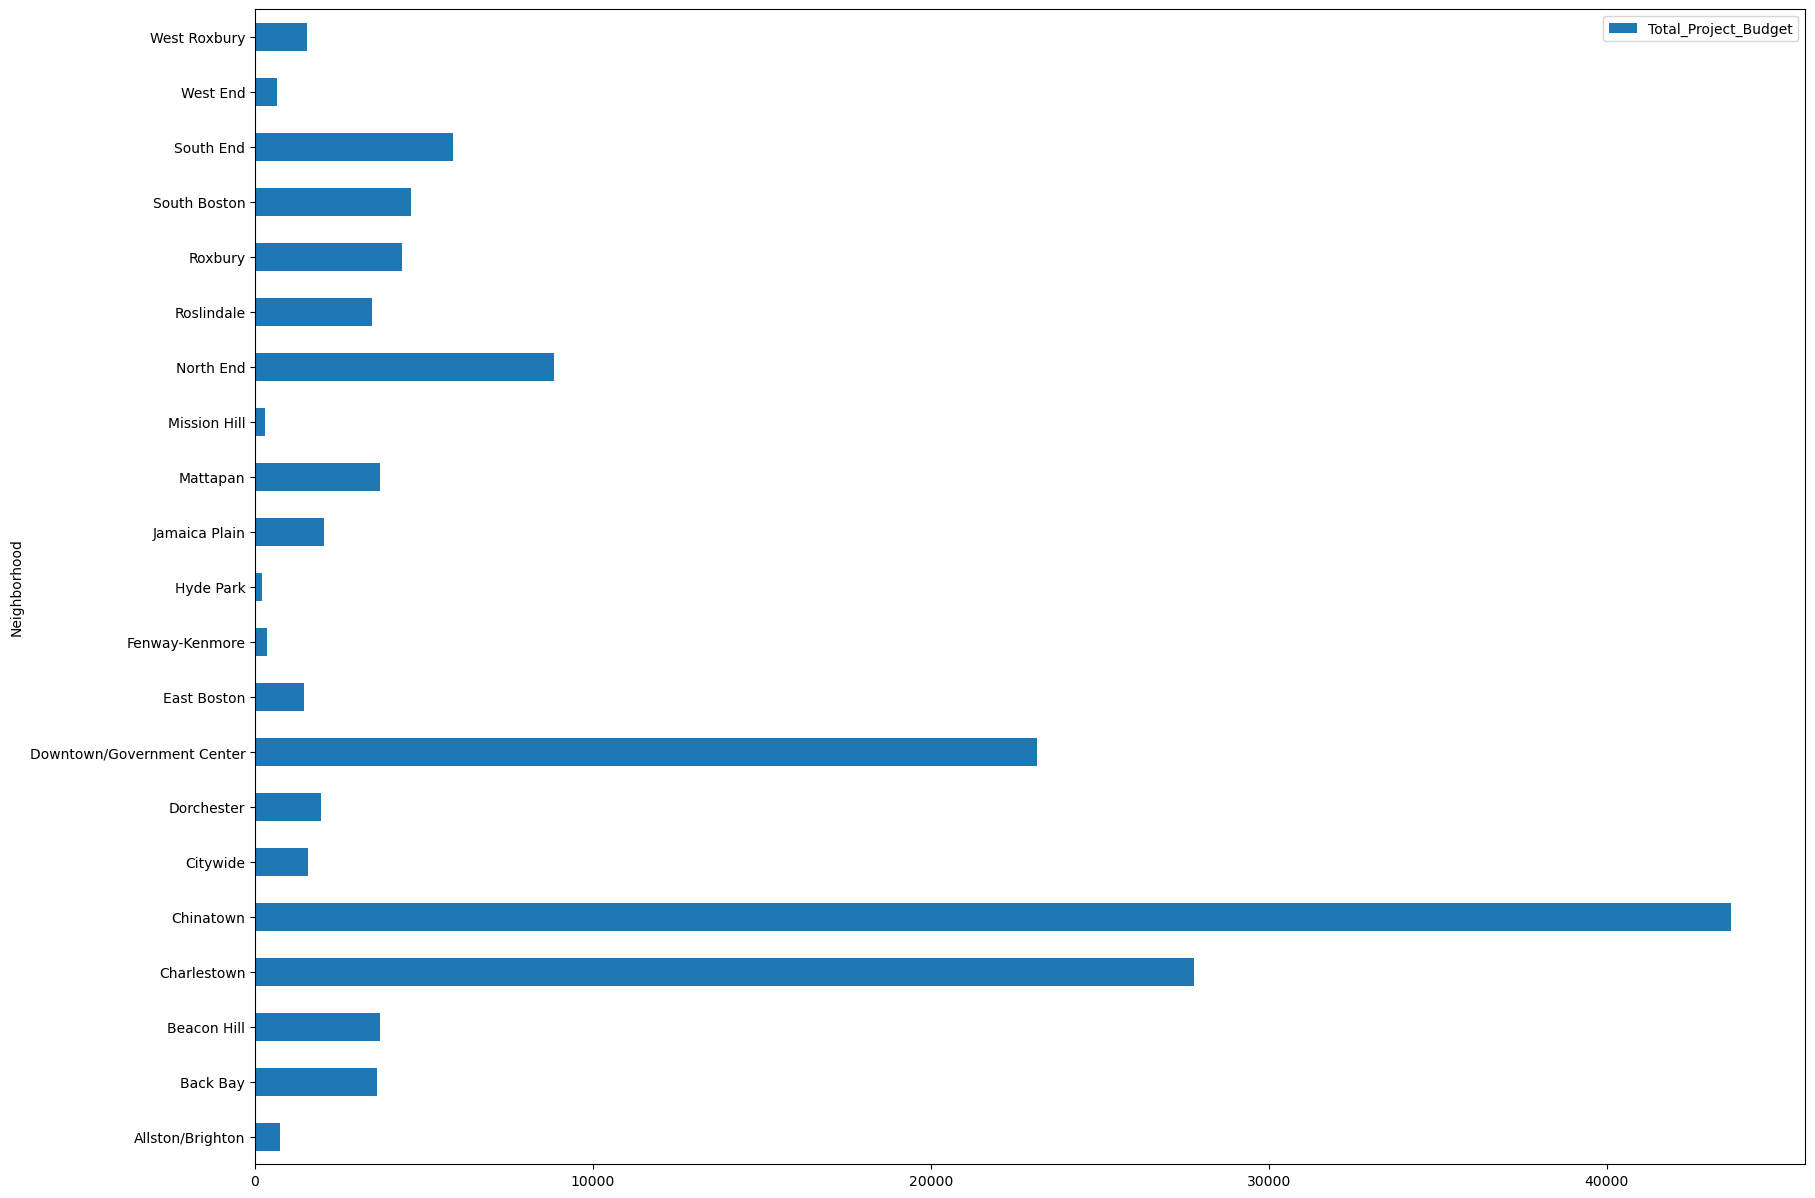

In [107]:
capital_budget_area_per_capita.plot.barh(x='Neighborhood', y='Total_Project_Budget', figsize=(20,15))

Areas that has/will have the highest per capita budget:

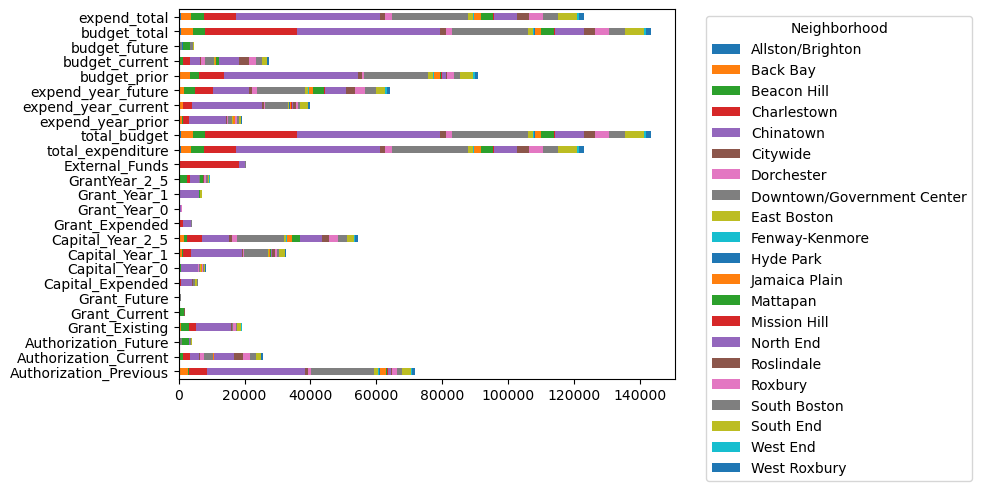

In [108]:
capital_budget_area_per_capita.drop(columns="Total_Project_Budget").groupby('Neighborhood').sum().transpose().plot(kind='barh',stacked=True)

plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Chinatown, Downtown and Charlestown are the major areas that make up the budget

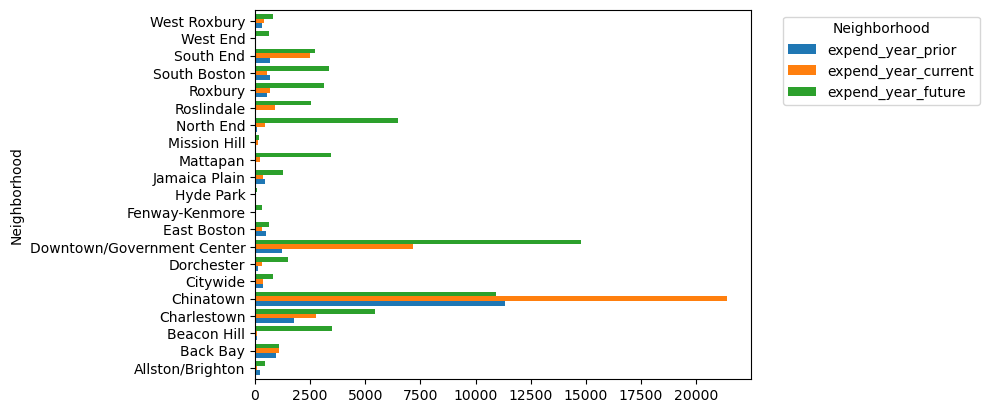

In [109]:
capital_budget_area_per_capita['expend_year_prior'] = capital_budget_area_per_capita[['Capital_Year_0', 'Grant_Year_0', 'Capital_Expended', 'Grant_Expended']].sum(axis=1)
capital_budget_area_per_capita['expend_year_current'] = capital_budget_area_per_capita[['Capital_Year_1', 'Grant_Year_1']].sum(axis=1)
capital_budget_area_per_capita['expend_year_future'] = capital_budget_area_per_capita[['Capital_Year_2_5', 'GrantYear_2_5']].sum(axis=1)

capital_budget_area_per_capita[['Neighborhood', 'expend_year_prior', 'expend_year_current', 'expend_year_future']].plot.barh(x='Neighborhood',  width=0.8)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

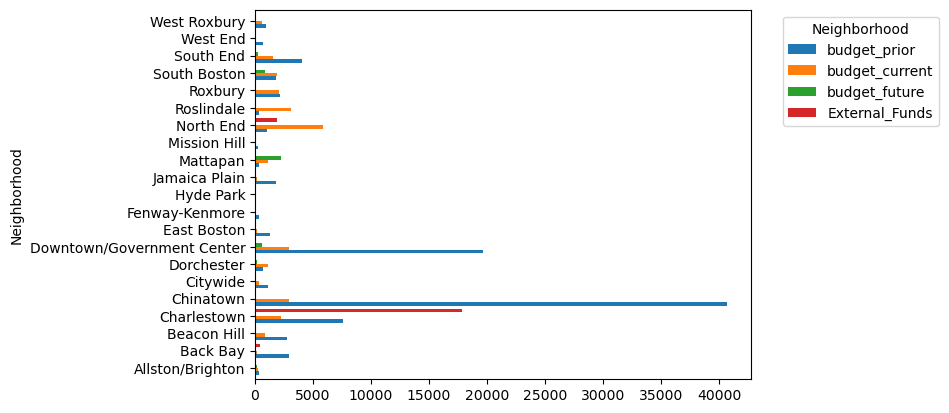

In [110]:
capital_budget_area_per_capita['budget_prior'] = capital_budget_area_per_capita[['Grant_Existing', 'Authorization_Previous']].sum(axis=1)
capital_budget_area_per_capita['budget_current'] = capital_budget_area_per_capita[['Grant_Current', 'Authorization_Current']].sum(axis=1)
capital_budget_area_per_capita['budget_future'] = capital_budget_area_per_capita[['Grant_Future', 'Authorization_Future']].sum(axis=1)

capital_budget_area_per_capita[['Neighborhood', 'budget_prior', 'budget_current', 'budget_future', 'External_Funds']].plot.barh(x='Neighborhood',  width=0.8)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Similar to the total budget and expenditure, the per capita budget is mostly planned from previous years to, some of them current, and mostly future expenditures. Noticeably, the external funds in Charlestown per capita is enourmous, meaning there are perhaps important projects there.